# Aproksimacija High Pass filtra metodom prozora

High-Pass filtri se koriste za uklanjanje niskih frekvencija iz signala.
Kako idealni filter nije ostvariv u realnom svetu aprkosimiracemo ga metodom prozora. 
Frekvencijski odziv filtra odgovara konvoluciji Furijeovih transformacija sinc funkcije i prozorske funkcije:

$H(e^{jw}) = (S * W)(e^{jw})$

Na osnovu teoreme modulacije: $DTFT( x[n]y[n] ) = (X * Y)(e^{jw})$ mozemo zakljuciti da cemo impulsni odziv aproksimiranog filtra dobiti mnozenjem odbiraka sinc i prozorske funkcije.

$h[n]=s[n]w[n]$

Filtriranje cemo vrsiti konvolucijom signala i impulsnog odziva filtra, sto je prema konvolucionoj teoremi u frekvencijskom domenu proizvod Furijeovih transformacija: $DTFT(x[n] * h^[n]) = X(e^{jw})H(e^{jw})$

$new[n]=x[n] * h[n]$

U ovoj svesci formiracemo high pass filtar pomocu dve vrste prozora, pravougaonog i Blackman-ovog.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import IPython
import scipy
from scipy import signal
import pandas as pd

Prvi korak je formiranje sinc i prozorske funkcije. Nakon toga se formira low-pass filtar iz kojeg se dobija high-pass.


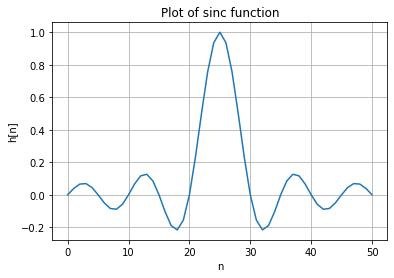

In [2]:
cutoff = 0.1  # Cutoff frequency
b = 0.08  # Transition band(prelazni opseg)
N = int(np.ceil((4 / b)))
if not N % 2: N += 1  # sigurnost da je N neparno
n = np.arange(N)
 
# izracunavanje sinc funkcije
sinc_f = np.sinc(2 * cutoff * (n - (N - 1) / 2))

plt.xlabel('n');
plt.ylabel('h[n]');
plt.title('Plot of sinc function');
plt.grid();
plt.plot(n, sinc_f);

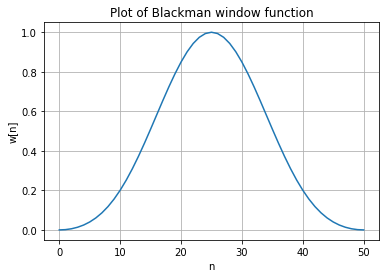

In [3]:
window_b = np.blackman(N)
plt.grid();
plt.xlabel('n');
plt.ylabel('w[n]');
plt.title(r'Plot of Blackman window function');
plt.plot(n, window_b);

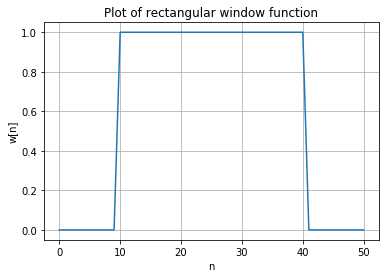

In [4]:
window_r = np.zeros(N)
window_r[10:41] = 1
plt.grid();
plt.xlabel('n');
plt.ylabel('w[n]');
plt.title(r'Plot of rectangular window function');
plt.plot(n, window_r);

 Nakon formiranih sinc i prozorskih funkcija, mnozimo ih u vremenskom domenu.

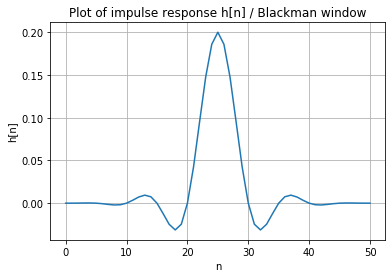

In [5]:
h_b = sinc_f * window_b
h_b = h_b / np.sum(h_b)
plt.grid();
plt.xlabel('n');
plt.ylabel('h[n]');
plt.title(r'Plot of impulse response h[n] / Blackman window');
plt.plot(n,h_b);

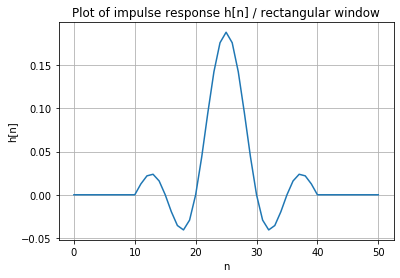

In [6]:
h_r = sinc_f * window_r
h_r = h_r / np.sum(h_r)
plt.grid();
plt.xlabel('n');
plt.ylabel('h[n]');
plt.title(r'Plot of impulse response h[n] / rectangular window');
plt.plot(n,h_r);

Ova dva impulsna odziva predstavljaju impulsne odzive niskofrekventnih filtara. Sto mozemo da pokazemo na sledeci nacin:

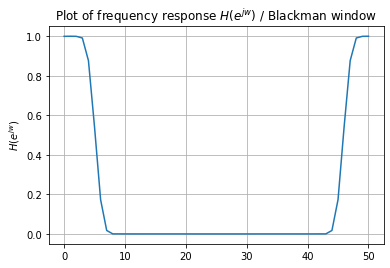

In [7]:
X_b = np.fft.fft(h_b);
plt.grid();
plt.ylabel('$H(e^{jw})$');
plt.title(r'Plot of frequency response $H(e^{jw})$ / Blackman window');
plt.plot(abs(X_b));

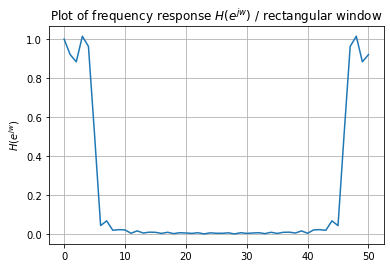

In [8]:
X_r = np.fft.fft(h_r);
plt.grid();
plt.ylabel('$H(e^{jw})$');
plt.title(r'Plot of frequency response $H(e^{jw})$ / rectangular window');
plt.plot(abs(X_r));

Da bismo dobili impulsni odziv high-pass filtra neophodno je da izvrsimo spektralnu inverziju impulsnih odziva.

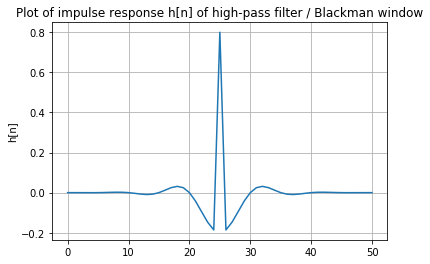

In [9]:
h_b = -h_b
h_b[int((N - 1) / 2)] += 1
plt.grid();
plt.ylabel('h[n]');
plt.title(r'Plot of impulse response h[n] of high-pass filter / Blackman window');
plt.plot(h_b);

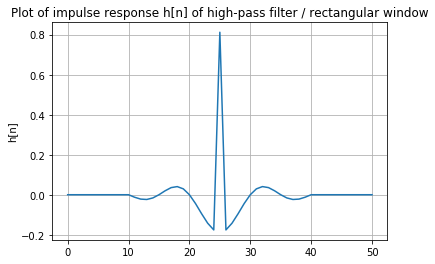

In [10]:
h_r = -h_r
h_r[int((N - 1) / 2)] += 1
plt.grid();
plt.ylabel('h[n]');
plt.title(r'Plot of impulse response h[n] of high-pass filter / rectangular window');
plt.plot(h_r);

Sada cemo na dobijenim impulsnim odzivima izvrsiti Furijeovu transformaciju i pokazati da smo dobili high-pass filtre. Kod high-pass filtra sa pravougaonim prozorom uocavamo Gibsov fenomen.

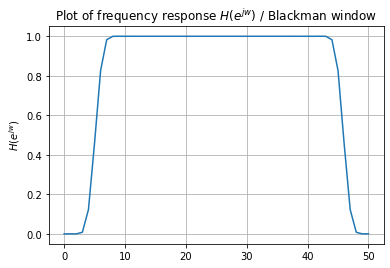

In [11]:
Y_b = np.fft.fft(h_b);
plt.grid();
plt.ylabel('$H(e^{jw})$');
plt.title(r'Plot of frequency response $H(e^{jw})$ / Blackman window');
plt.plot(abs(Y_b));

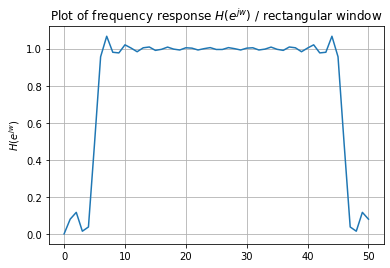

In [12]:
Y_r = np.fft.fft(h_r);
plt.grid();
plt.ylabel('$H(e^{jw})$');
plt.title(r'Plot of frequency response $H(e^{jw})$ / rectangular window');
plt.plot(abs(Y_r));

Ucitacemo podatke i filtrirati pomocu ova dva filtra. Filtriranje vrsimo konvolucijom u vremenskom domenu.

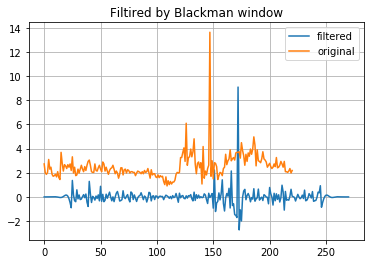

In [16]:
data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/wind_speed_laurel_nebraska.csv')
k = list(data['10 Min Std Dev'])
plt.grid();
new_signal_b = np.convolve(k,h_b);
plt.title(r'Filtired by Blackman window');
plt.plot(new_signal_b, label = 'filtered');
plt.plot(k, label = 'original');
plt.legend();

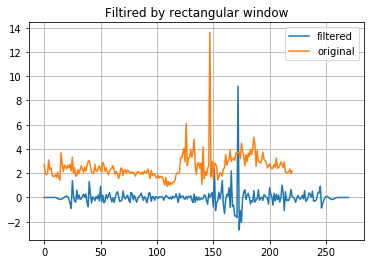

In [17]:
new_signal_r = np.convolve(k,h_r);
plt.title(r'Filtired by rectangular window');
plt.plot(new_signal_r, label = 'filtered');
plt.plot(k, label = 'original');
plt.grid();
plt.legend();